# Binary Classification with a Software Defects Dataset


Walter Reade, Ashley Chow. (2023). Binary Classification with a Software Defects Dataset. Kaggle. https://kaggle.com/competitions/playground-series-s3e23


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

In [21]:
df = pd.read_csv("/Users/bilge.karaca/python-wd/2_ev-time_deep-learning/playground-series-s3e23/train.csv")

In [22]:
len(df)

101763

## Spare a test dataset

In [23]:
# Shuffle data

rnd.seed(42)
df_shuffle_idx = [rnd.randint(0,len(df)-1) for x in range(len(df))]
df_shuffled = df.iloc[df_shuffle_idx,:].copy()
print("Length of shuffled dataset:", len(df_shuffled))
df_shuffled.reset_index(inplace = True, drop=True)
df_shuffled.head()

# Create train_df

train_df = df_shuffled.iloc[:20000,:].copy()

print("Length of train dataset:", len(train_df))

train_df.reset_index(inplace = True, drop=True)

Length of shuffled dataset: 101763
Length of train dataset: 20000


In [24]:
train_df.head().T

,0,1,2,3,4
id,83810,14592,3278,97196,36048
loc,13.0,151.0,14.0,40.0,16.0
v(g),3.0,25.0,1.0,7.0,2.0
ev(g),1.0,6.0,1.0,7.0,1.0
iv(g),2.0,16.0,1.0,7.0,2.0
n,33.0,346.0,38.0,130.0,37.0
v,152.93,2148.47,155.32,682.44,165.0
l,0.12,0.03,0.18,0.05,0.14
d,8.25,39.81,5.45,18.04,7.0
i,18.35,53.96,30.37,32.5,23.96


In [25]:
# Check class imbalance

train_df.defects.value_counts(normalize=True)

False    0.7704
True     0.2296
Name: defects, dtype: float64

In [26]:
# Encode False/True as 0/1

train_df.defects = np.where(train_df.defects==True,1,0)

In [27]:
train_df.defects.value_counts(normalize=True)

0    0.7704
1    0.2296
Name: defects, dtype: float64

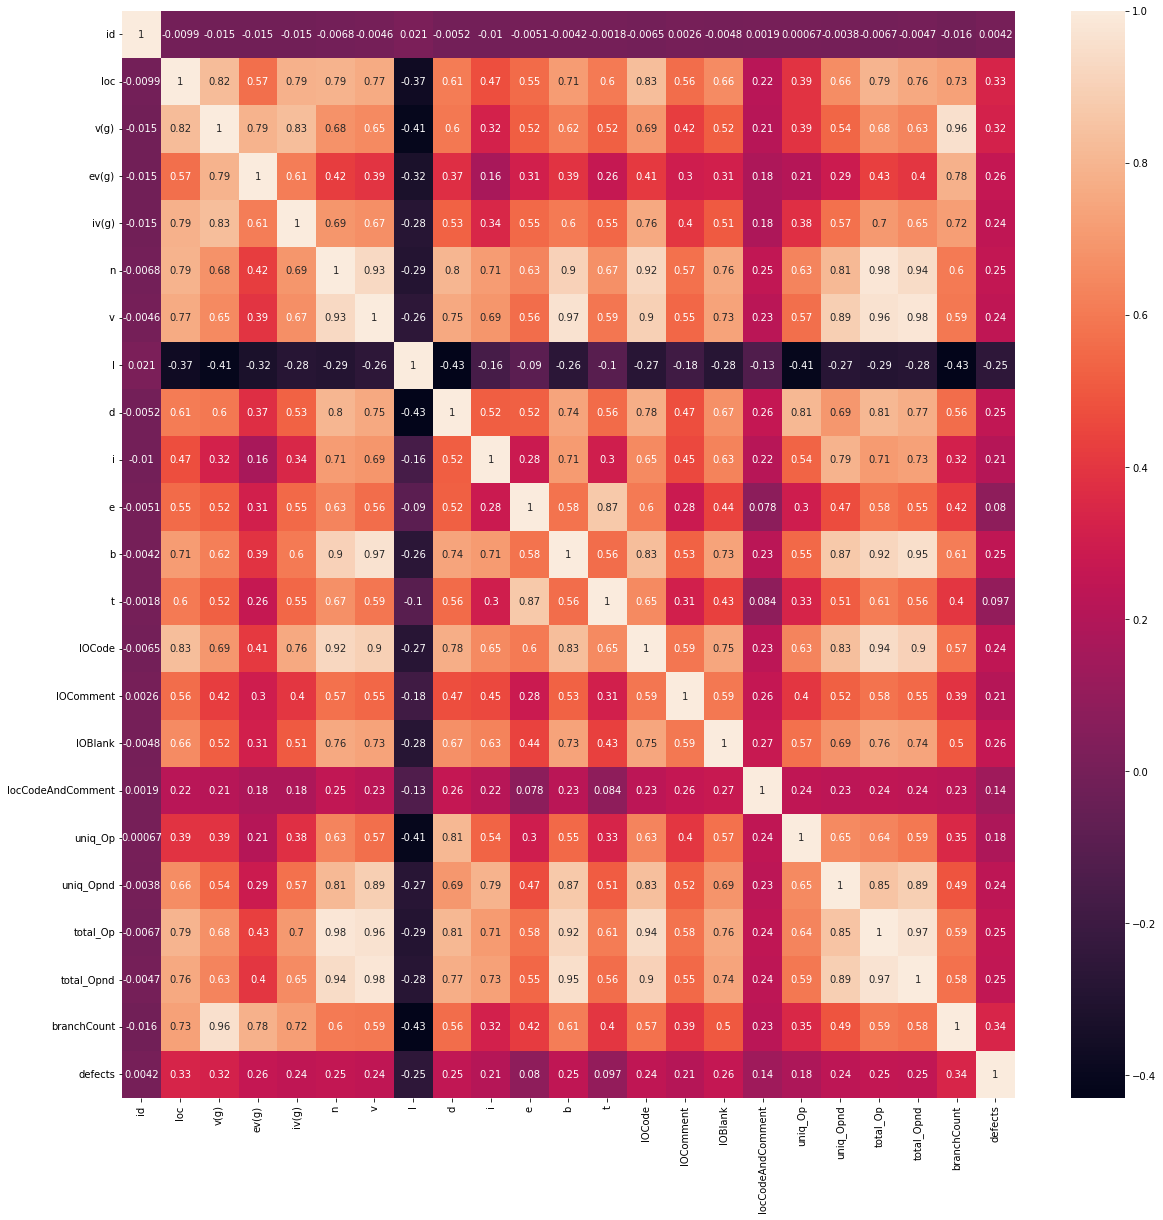

In [28]:
# Check correlations

plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True);

In [29]:
# Drop highly correlated columns

train_df.drop(["n","v","b","total_Opnd","v(g)"],inplace=True,axis=1)

In [30]:
# Drop id columns

df_with_id = train_df.copy()
train_df.drop("id", inplace=True,axis=1)

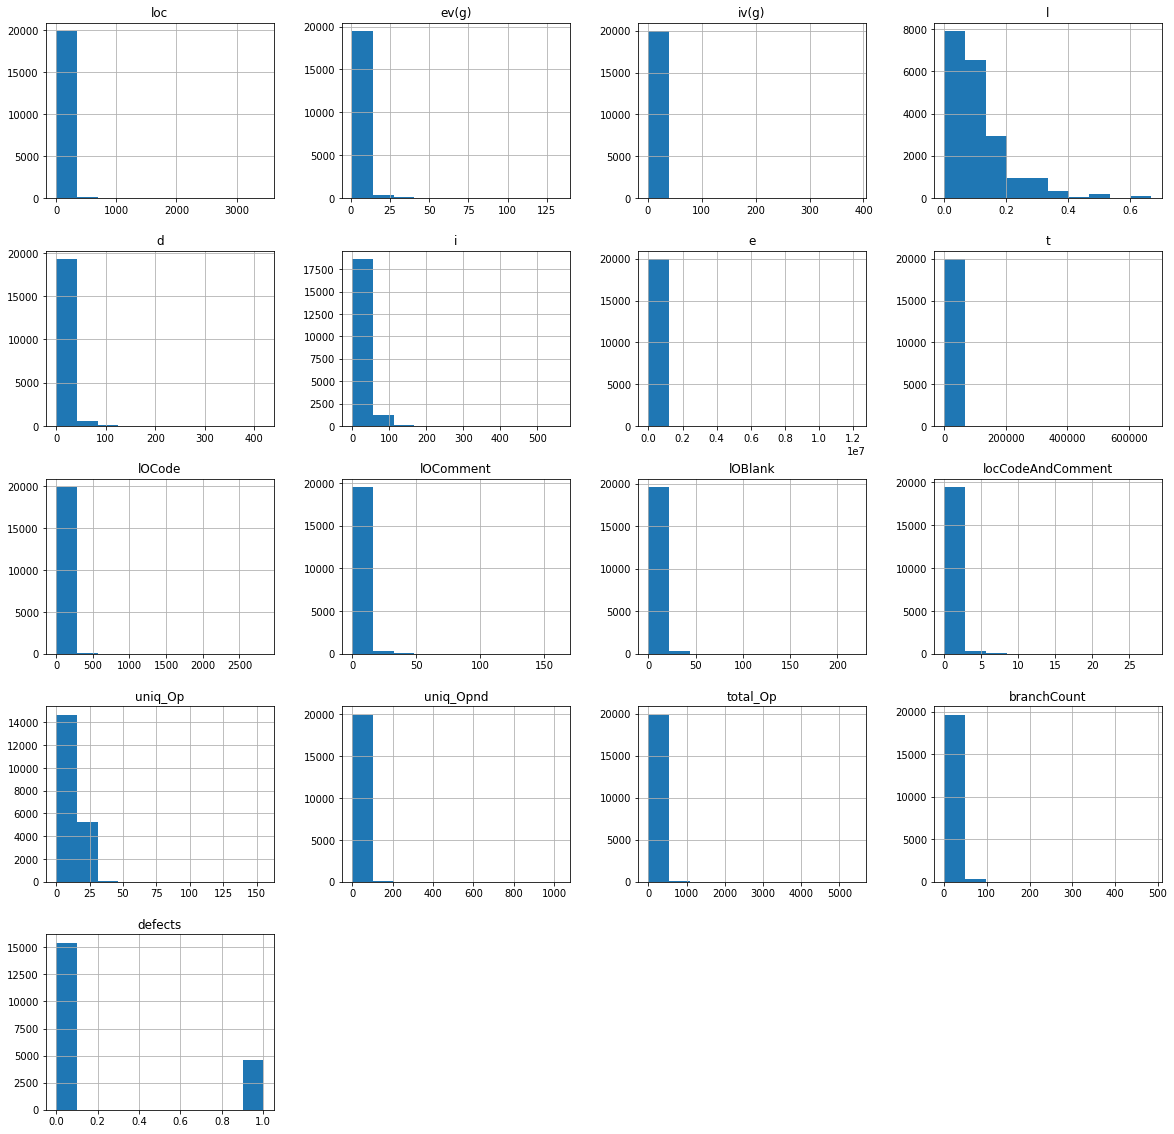

In [31]:
train_df.hist(figsize=[20,20]);

In [33]:
def logOrSqrtTransform(df):
    
    """
    Apply sqrt transformation if the column has zero values.
    Apply log transformation if the column has no zeroes.
      
    """
    
    if "defects" in df.columns:
        df_new = df.drop("defects", axis=1)
        
    a = {}
    
    for col in df_new.columns:
        if df_new[col].isin([0]).any() == False:
            a[col] = np.log(df_new[col])
            print("Log transformation applied")
        else:  
            a[col] = np.sqrt(df_new[col])
            print("Sqrt transformation applied")
            
    df_transformed = pd.DataFrame(a)
    if "defects" in df.columns:
        df_transformed["defects"] = df.defects
    
    return df_transformed

In [96]:
train_df_tfd = logOrSqrtTransform(train_df)
train_df_tfd2 = logOrSqrtTransform(train_df_tfd)

Log transformation applied
Log transformation applied
Log transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Log transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied


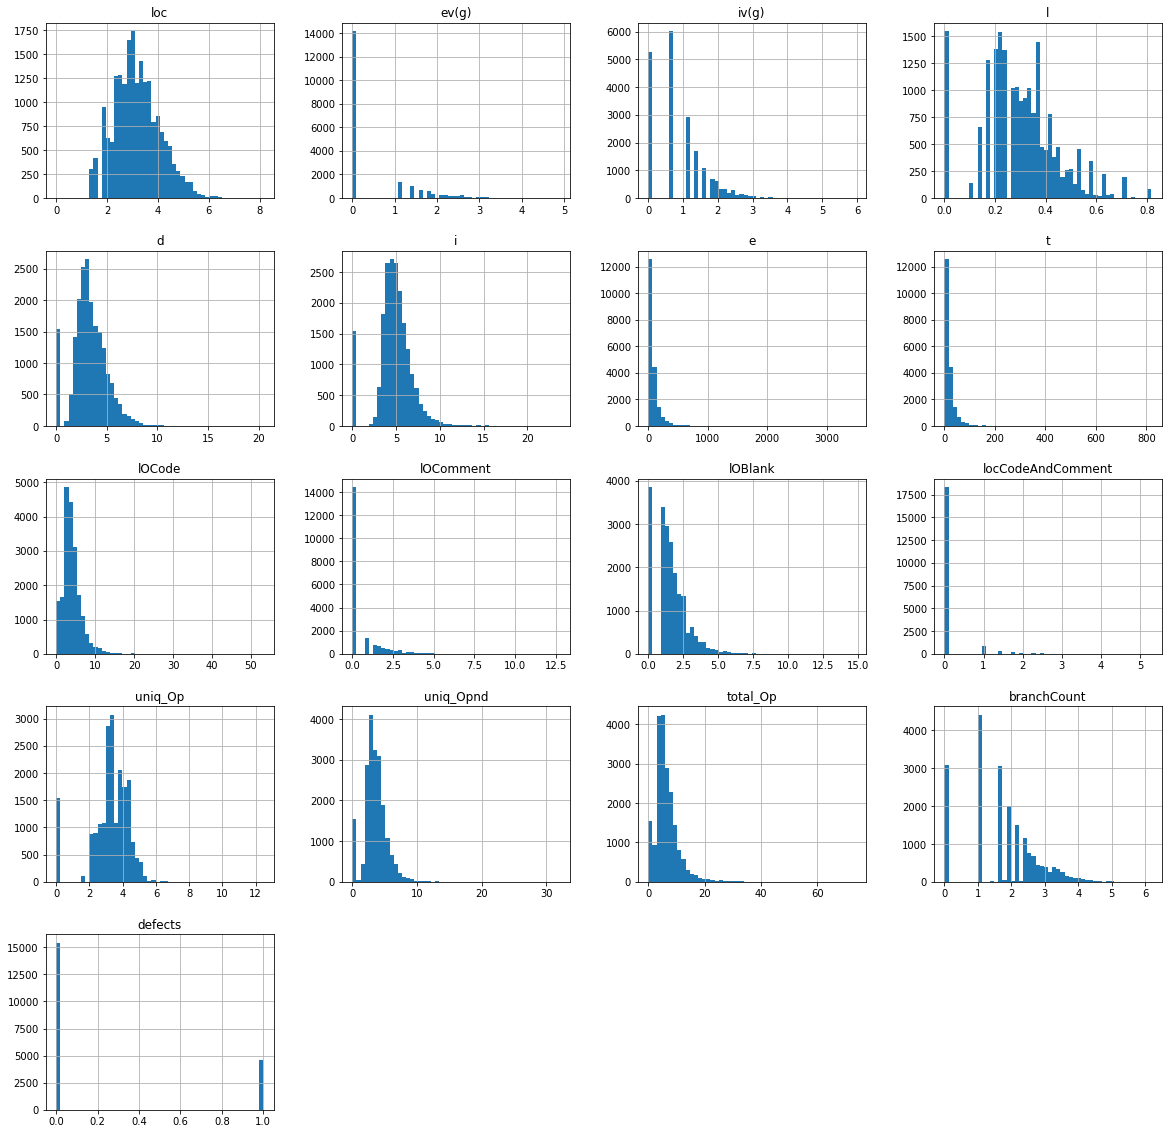

In [97]:
train_df_tfd.hist(figsize=[20,20],bins=50);

In [118]:
sorted(set(train_df_tfd2["iv(g)"]))

[0.0,
 0.8325546111576977,
 1.048147073968205,
 1.1774100225154747,
 1.2686362411795196,
 1.3385661990458504,
 1.3949588341794583,
 1.442026886600883,
 1.4823038073675112,
 1.5174271293851465,
 1.5485138917033876,
 1.5763586678760644,
 1.6015459273656616,
 1.624517568269195,
 1.6456154475156735,
 1.6651092223153954,
 1.6832151805566085,
 1.70010933704164,
 1.71593676432625,
 1.7308183826022854,
 1.7448559934055943,
 1.7581360736183977,
 1.7707326777153998,
 1.782709687623856,
 1.7941225779941015,
 1.8050198165176699,
 1.815443985917585,
 1.8254326912201402,
 1.835019299622343,
 1.8442335485675765,
 1.853102049128743,
 1.861648705529517,
 1.8698950669667216,
 1.8778606243851437,
 1.8855630621884312,
 1.8930184728248454,
 1.9002415406058841,
 1.9072456998840988,
 1.9206455826398414,
 1.933305360847936,
 1.9452993687137876,
 1.9510670131418653,
 1.9727697022487511,
 1.977883466088977,
 1.98288316164224,
 2.001832456833606,
 2.0192913221983892,
 2.035469166160847,
 2.039333980337618,
 2.05

# Feature Exploration

In [ ]:
# Exrait binary columns from "ev(g)", "l", "d","i","lOComment", "lOBlank",
#'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op',

In [142]:
train_df_2 = train_df_tfd2.copy()

cols_binarize = ["ev(g)","iv(g)" ,"l", "d","i","lOComment", "lOBlank",'locCodeAndComment', 
                 'uniq_Op', 'uniq_Opnd', 'total_Op', "branchCount"]

map_col_to_min ={}

for col in cols_binarize:
    print(col, "\t:\t", min(train_df_tfd2[col]))
    map_col_to_min[col] =  min(train_df_tfd2[col])

ev(g) 	:	 0.0
iv(g) 	:	 0.0
l 	:	 0.0
d 	:	 0.0
i 	:	 0.0
lOComment 	:	 0.0
lOBlank 	:	 0.0
locCodeAndComment 	:	 0.0
uniq_Op 	:	 0.0
uniq_Opnd 	:	 0.0
total_Op 	:	 0.0
branchCount 	:	 0.0


In [143]:
map_col_to_min

{'ev(g)': 0.0,
 'iv(g)': 0.0,
 'l': 0.0,
 'd': 0.0,
 'i': 0.0,
 'lOComment': 0.0,
 'lOBlank': 0.0,
 'locCodeAndComment': 0.0,
 'uniq_Op': 0.0,
 'uniq_Opnd': 0.0,
 'total_Op': 0.0,
 'branchCount': 0.0}

In [136]:
min(train_df_tfd2["branchCount"])

0.0

In [144]:
for k,v in map_col_to_min.items():
    train_df_2[k + "_isZero"] = np.where(train_df_2[k]==v,1,0)
    train_df_2[k] = train_df_2[k].replace(v,np.nan)

In [129]:
#sorted(set(train_df["branchCount"]))

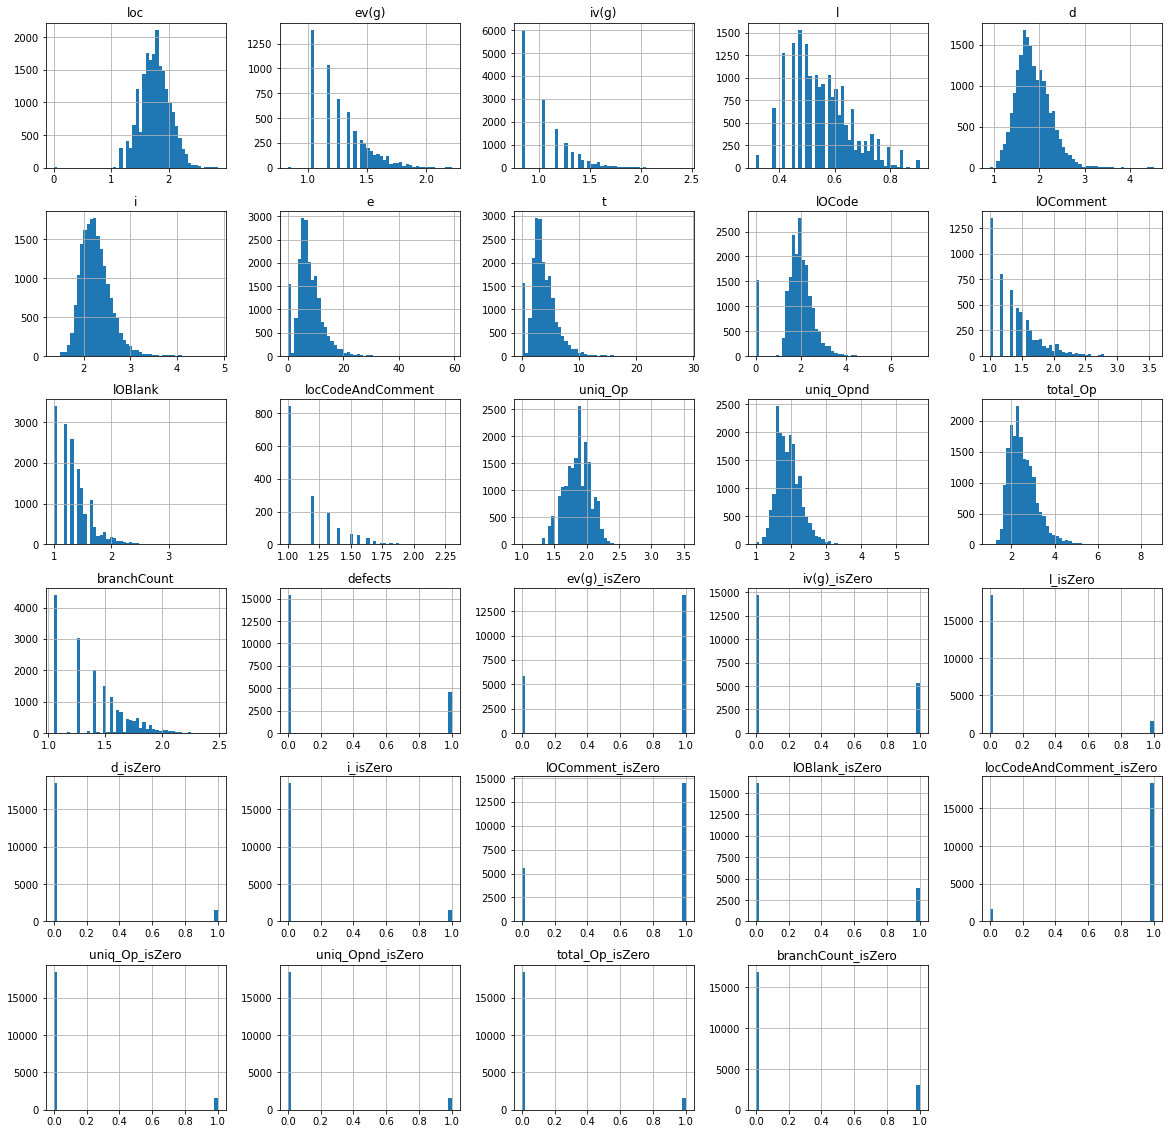

In [145]:
train_df_2.hist(figsize=[20,20],bins=50);

In [76]:
rnd.seed(42)
smp_idx = [rnd.randint(0,len(train_df_tfd.defects)-1) for x in range(500)]
df_smp_05k = train_df_tfd.iloc[smp_idx,:].copy()
df_smp_05k.drop_duplicates(inplace=True)

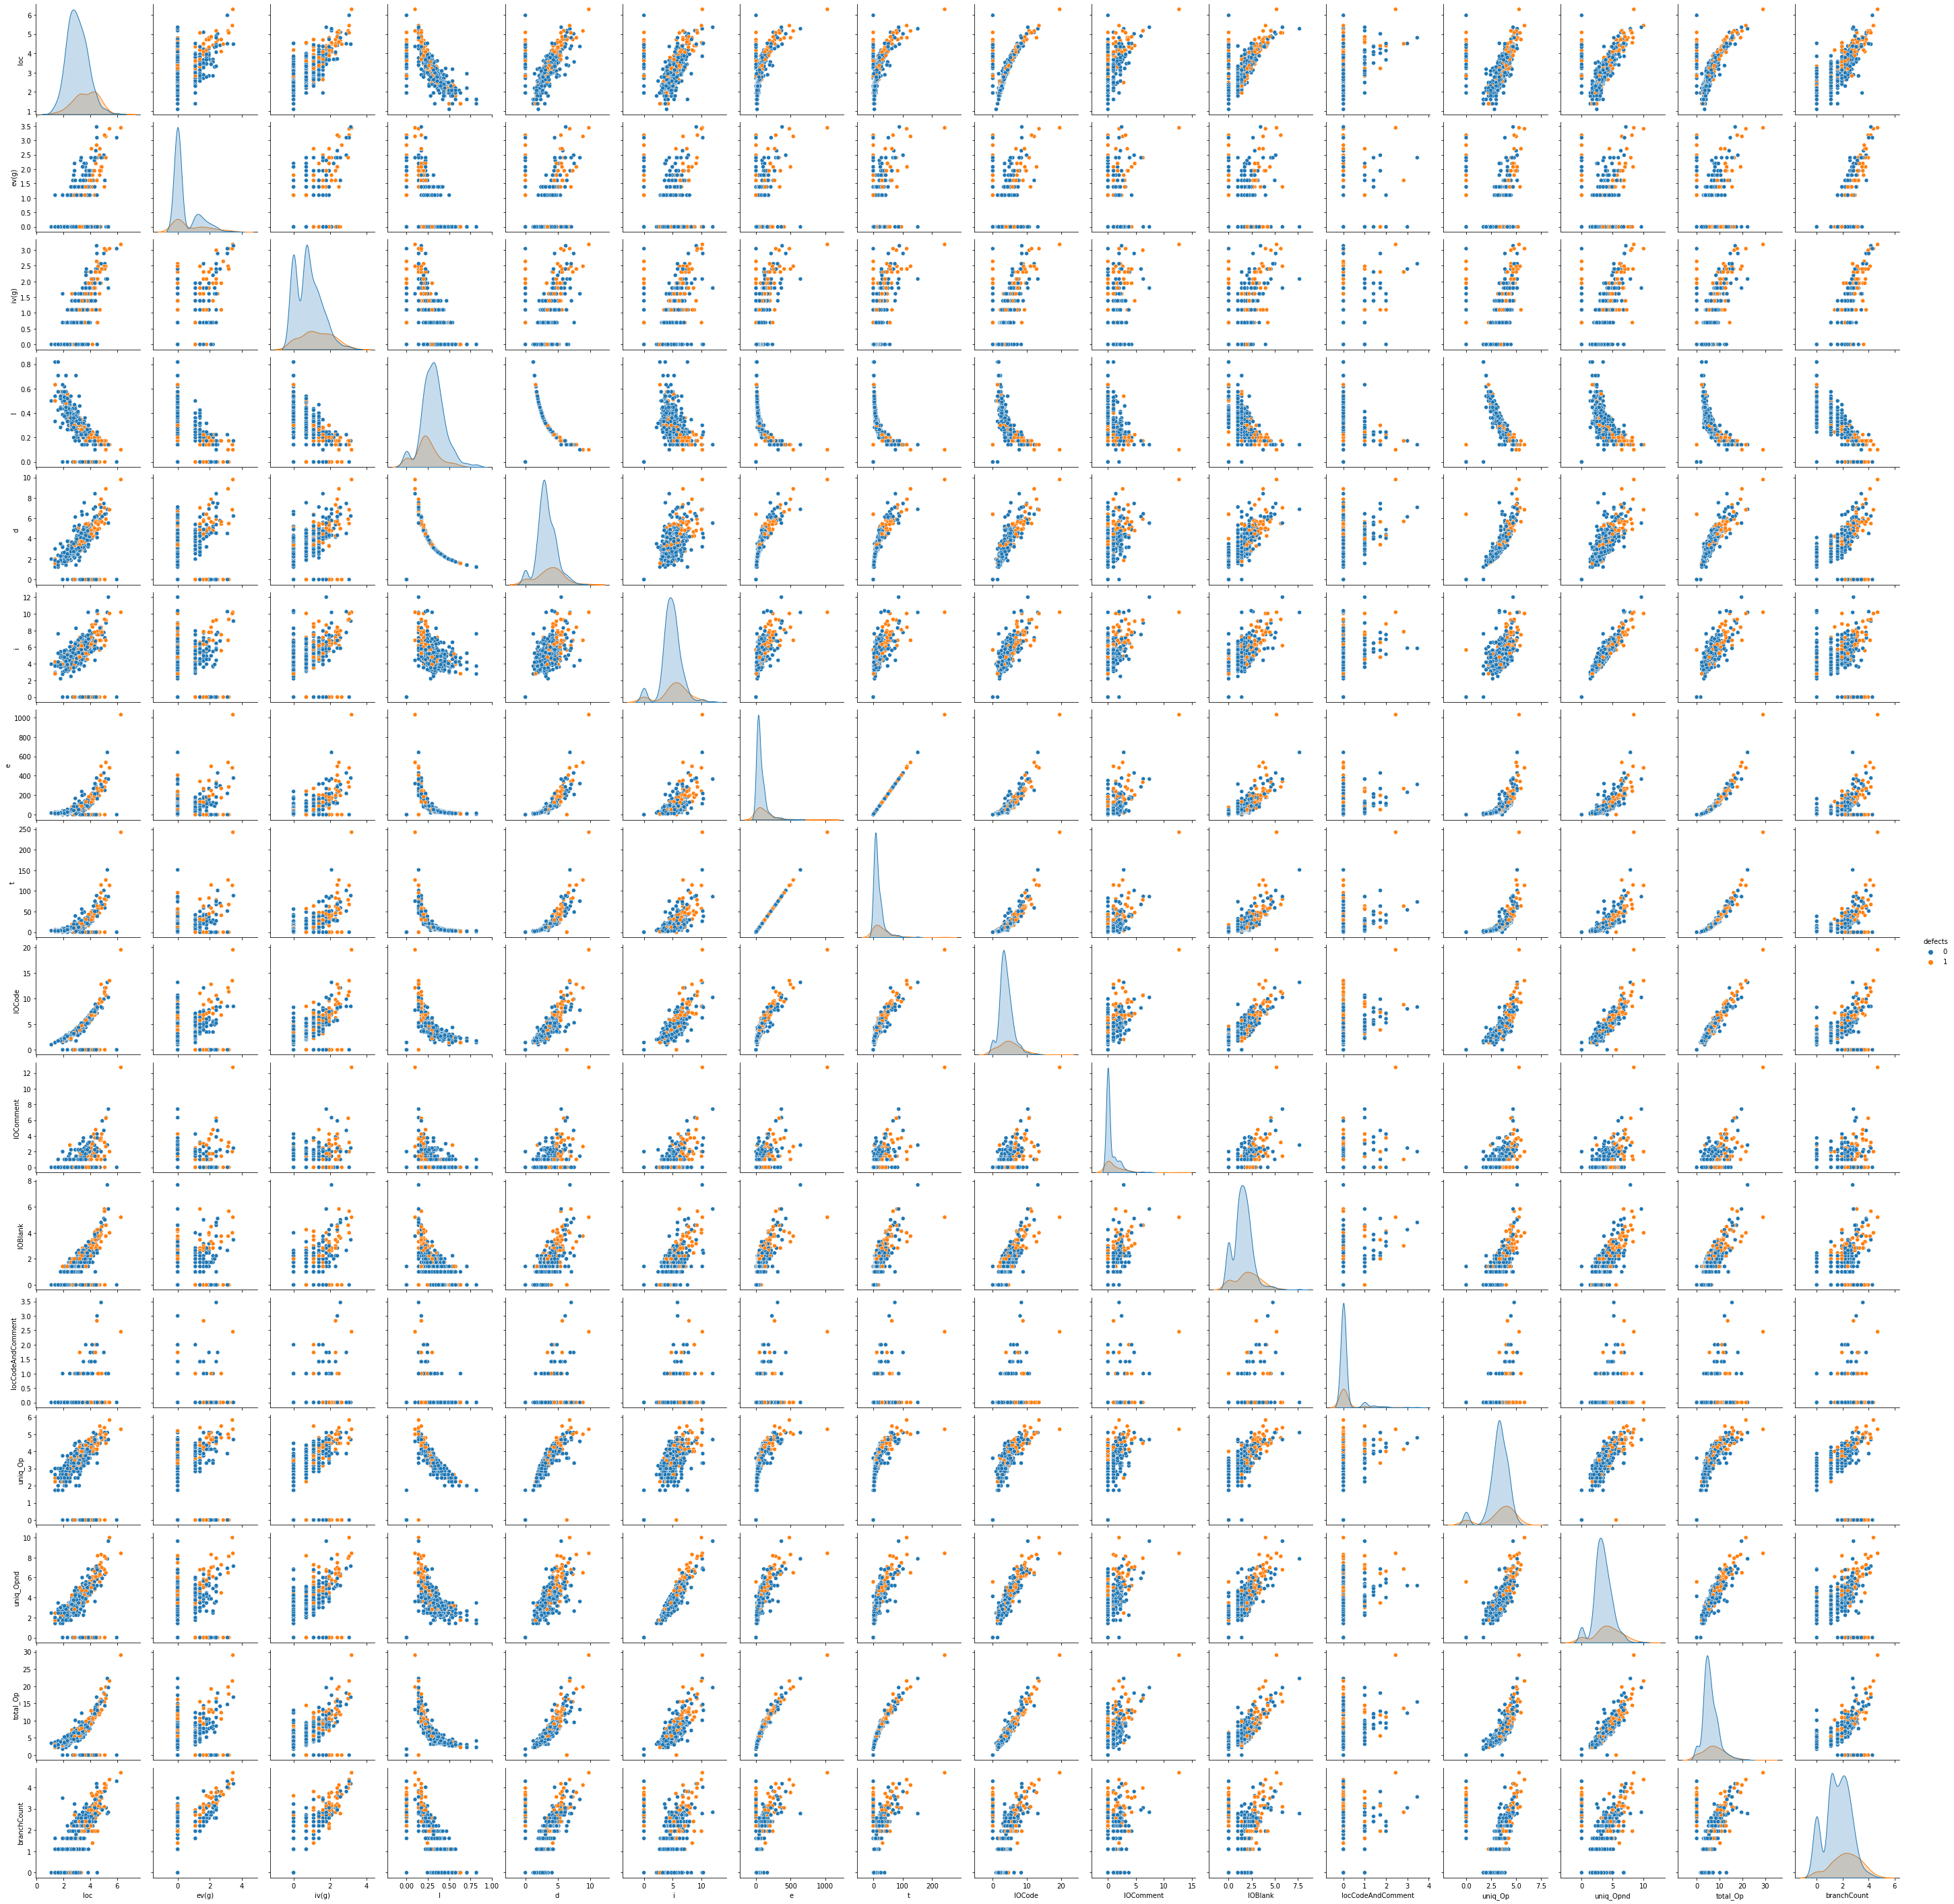

In [77]:
sns.pairplot(data=df_smp_05k, hue="defects");

In [146]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve, train_test_split,LearningCurveDisplay,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import FunctionTransformer
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer

In [151]:
y = train_df_tfd2.defects
X = train_df_tfd2.drop("defects", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:
y2 = train_df_2.defects
X2 = train_df_2.drop("defects", axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

### Get Benchmark

In [148]:
pipe = Pipeline(steps = [ ("imputer", SimpleImputer(strategy="median")),
                          ("scaler", StandardScaler()),
                          ("sampler", RandomOverSampler(sampling_strategy= 0.7,
                                                        random_state=42)),
                          ("clf", LogisticRegression(C=3, random_state=42,max_iter=5000))
                                              
                        ])

In [149]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [153]:
print("D1:", cross_val_score(pipe, X_train, y=y_train, scoring="roc_auc", cv=kfold).mean())
print("D2:",cross_val_score(pipe, X_train2, y=y_train2, scoring="roc_auc", cv=kfold).mean())

D1: 0.7837876840869991
D2: 0.787180914334656


In [83]:
y_train.value_counts(normalize=True)

0    0.77306
1    0.22694
Name: defects, dtype: float64

### Apply GridSearch

In [154]:
param_grid = [{"clf__C": [0.5,1,1.5],
              "clf__solver": ["liblinear"],
              "clf__penalty": ["l1", "l2"],
              "sampler__sampling_strategy": [0.4,0.5]},

             {"clf__C": [0.5,1,1.5],
             "clf__solver": ["lbfgs", "newton-cg", "newton-cholesky", "sag"],
             "clf__penalty": ["l2"],
             "sampler__sampling_strategy":[0.4,0.5]},

             {"clf__C": [0.5,1,1.5],
             "clf__solver": ["saga"],
             "clf__penalty": ["elasticnet"],
              "clf__l1_ratio":[0.3,0.5,0.7],
             "sampler__sampling_strategy": [0.4,0.5]}]

grid = GridSearchCV(pipe, 
                    param_grid=param_grid, 
                    scoring="roc_auc", 
                    cv=kfold, 
                    verbose=1, 
                    return_train_score=True,
                    error_score='raise')

In [156]:
print("D1, LOGISTIC REGRESSION\n\n\n")
grid.fit(X_train, y_train)

print("\nBest estimator :",grid.best_estimator_)
print("\nBest parameters:",grid.best_params_)
print("\nBest parameters:",grid.best_score_)
print('\nTrain AUC score:', grid.score(X_train, y_train))
print("Test AUC score:", grid.score(X_test, y_test))

print("\n\n\n")
print("D2, LOGISTIC REGRESSION\n\n\n")

grid.fit(X_train2, y_train2)

print("\nBest estimator :",grid.best_estimator_)
print("\nBest parameters:",grid.best_params_)
print("\nBest parameters:",grid.best_score_)
print('\nTrain AUC score:', grid.score(X_train2, y_train2))
print("Test AUC score:", grid.score(X_test2, y_test2))

print("\n\n\n")

D1, LOGISTIC REGRESSION



Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best estimator : Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler',
                 RandomOverSampler(random_state=42, sampling_strategy=0.5)),
                ('clf',
                 LogisticRegression(C=0.5, max_iter=5000, random_state=42))])

Best parameters: {'clf__C': 0.5, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'sampler__sampling_strategy': 0.5}

Best parameters: 0.7837168341869448

Train AUC score: 0.7849447517451349
Test AUC score: 0.7837564530400273
D2, LOGISTIC REGRESSION



Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best estimator : Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler',
                 RandomOverSampler(random_state=42, sampling_strategy=0.4)),
                ('clf',
        

In [92]:
print("Class order:", grid.classes_)
grid.predict_proba(X_test)

Class order: [0 1]


array([[0.96278808, 0.03721192],
       [0.77691884, 0.22308116],
       [0.3662741 , 0.6337259 ],
       ...,
       [0.08715869, 0.91284131],
       [0.66207104, 0.33792896],
       [0.75312943, 0.24687057]])

In [158]:
y_pred2 = grid.predict(X_test2)

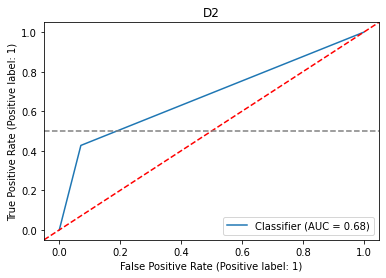

In [159]:
from sklearn.metrics import RocCurveDisplay
"""
plt.subplot(1,2,1)
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.axline(xy1=(0,0), slope=1,color="red", linestyle="--",)
plt.axhline(y=0.5, color="grey", linestyle="--",)
plt.title("D2")
"""

RocCurveDisplay.from_predictions(y_test2, y_pred2)
plt.axline(xy1=(0,0), slope=1,color="red", linestyle="--",)
plt.axhline(y=0.5, color="grey", linestyle="--",)
plt.title("D2")
plt.show();

## XGBoost

In [191]:
pipe = Pipeline(steps = [ ("imputer", SimpleImputer(strategy="median")),
                          ("scaler", StandardScaler()),
                          ("sampler", RandomOverSampler(sampling_strategy= 0.7,
                                                        random_state=42)),
                          ('classifier', XGBClassifier(objective='binary:logistic', 
                                                       eval_metric = "auc",
                                                       random_state = 42,
                                                       n_estimators=1000, 
                                                        eta=0.01, # default 0.3
                                                        max_depth=5, 
                                                       subsample=0.7, 
                                                       min_child_weight=100, 
                                                    #   gamma=1, 
                                                    #   reg_lambda=1, 
                                                    #   alpha=0.1, 
                                                       colsample_bytree=0.7, 
                                                       #colsample_bylevel=0.5,
                                                    #   scale_pos_weight = 0.2
                                                   )
                                                   )
                            ]
                   )

param_grid = [{ 
             #  'classifier__n_estimators':[1000,1500],
             #   'classifier__eta': [0.005],
             #   'sampler__sampling_strategy' : [.7,.8,.9,1]
             #  'classifier__max_depth':[5,6,7],
              #  'classifier__min_child_weight': [100,200,300],
              #  'classifier__colsample_bytree':[.5,0.7,0.9],
               # 'classifier__subsample' : [.6,.7,.8],
               'classifier__alpha':[25], #  defult 0. Increasing this value will make model more conservative.
                 'classifier__gamma':[25], #  defult 0. Increasing this value will make model more conservative.
               'classifier__reg_lambda':[25], #  def=1 .Increasing this value will make model more conservative.
             #  'classifier__scale_pos_weight' : [.15,.2,.25]
          }
         ]


grid = GridSearchCV(pipe, 
                    param_grid=param_grid, 
                    scoring="roc_auc", 
                    cv=kfold, 
                    verbose=1, 
                    error_score='raise')

In [192]:
grid.fit(X_train2, y_train2)
print("\nBest estimator :",grid.best_estimator_)
print("\nBest parameters:",grid.best_params_)
print("\nBest score:",grid.best_score_)
print('\nTrain AUC score:', grid.score(X_train2, y_train2))
print("Test AUC score:", grid.score(X_test2, y_test2))

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator : Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler',
                 RandomOverSampler(random_state=42, sampling_strategy=0.7)),
                ('classifier',
                 XGBClassifier(alpha=25, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=0.7,
                               early_stopping_rounds=None,
                               enable_categorical...
                               eval_metric='auc', feature_types=None, gamma=25,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
  

In [193]:
model = grid.best_estimator_
model

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler',
                 RandomOverSampler(random_state=42, sampling_strategy=0.7)),
                ('classifier',
                 XGBClassifier(alpha=25, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=0.7,
                               early_stopping_rounds=None,
                               enable_categorical...
                               eval_metric='auc', feature_types=None, gamma=25,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=100, missing=nan,
                               monotone_constraints=None, n_estimators=1000,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train2, y_train2)
display = LearningCurveDisplay(train_sizes=train_sizes,train_scores=train_scores, 
                               test_scores=test_scores, score_name="roc_auc")
display.plot()
plt.show();

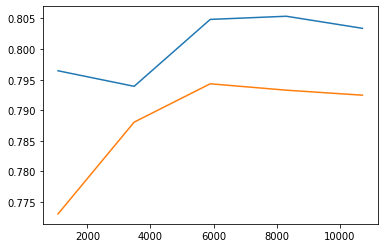

In [146]:
plt.plot(train_sizes, train_scores.mean(axis=1))
plt.plot(train_sizes, test_scores.mean(axis=1));

In [263]:
y_pred = grid.predict(X_test)
print("Class order:", grid.classes_)
grid.predict_proba(X_test)

Class order: [0 1]


array([[0.9615825 , 0.03841754],
       [0.7448729 , 0.2551271 ],
       [0.5069694 , 0.4930306 ],
       ...,
       [0.7847293 , 0.2152707 ],
       [0.39902437, 0.60097563],
       [0.94835126, 0.05164876]], dtype=float32)

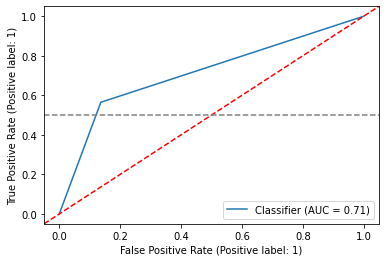

In [147]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.axline(xy1=(0,0), slope=1,color="red", linestyle="--",)
plt.axhline(y=0.5, color="grey", linestyle="--",)
plt.show();

# Fit the whole dataset

In [203]:
df = pd.read_csv("/Users/bilge.karaca/python-wd/2_ev-time_deep-learning/playground-series-s3e23/train.csv")

df.drop(["n","v","b","total_Opnd","v(g)", "id"],inplace=True,axis=1)


In [ ]:
df.tail()

In [204]:
df.defects = np.where(df.defects==True,1,0)

In [205]:
#(!!!!)
df_tfd = logOrSqrtTransform(df)
df_tfd2 = logOrSqrtTransform(df_tfd)

Log transformation applied
Log transformation applied
Log transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Log transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied


In [206]:
cols_binarize = ["ev(g)","iv(g)" ,"l", "d","i","lOComment", "lOBlank",'locCodeAndComment', 
                 'uniq_Op', 'uniq_Opnd', 'total_Op', "branchCount"]

map_col_to_min2 ={}

for col in cols_binarize:
    print(col, "\t:\t", min(df_tfd2[col]))
    map_col_to_min2[col] =  min(df_tfd2[col])
    

for k,v in map_col_to_min2.items():
    df_tfd2[k + "_isZero"] = np.where(df_tfd2[k]==v,1,0)
    df_tfd2[k] = df_tfd2[k].replace(v,np.nan)

ev(g) 	:	 0.0
iv(g) 	:	 0.0
l 	:	 0.0
d 	:	 0.0
i 	:	 0.0
lOComment 	:	 0.0
lOBlank 	:	 0.0
locCodeAndComment 	:	 0.0
uniq_Op 	:	 0.0
uniq_Opnd 	:	 0.0
total_Op 	:	 0.0
branchCount 	:	 0.0


In [207]:
y_sub_train = df_tfd2.defects
X_sub_train = df_tfd2.drop("defects", axis=1)

In [208]:
model.fit(X_sub_train, y_sub_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler',
                 RandomOverSampler(random_state=42, sampling_strategy=0.7)),
                ('classifier',
                 XGBClassifier(alpha=25, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=0.7,
                               early_stopping_rounds=None,
                               enable_categorical...
                               eval_metric='auc', feature_types=None, gamma=25,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=100, missing=nan,
                               monotone_constraints=None, n_estimators=1000,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [204]:
# model.fit(X_full, y_full)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler',
                 RandomOverSampler(random_state=42, sampling_strategy=0.4)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.9, early_stopping_rounds=None,
                               enable_categorical=False, et...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=200, missing=nan,
                               monotone_constraints=None, n_estimators=1000,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, ...))])

In [209]:
def logOrSqrtTransform2(df):
    
    """
    Apply sqrt transformation if the column has zero values.
    Apply log transformation if the column has no zeroes.
      
    """
    
    if "defects" in df.columns:
        df = df.drop("defects", axis=1)
        
    a = {}
    
    for col in df.columns:
        if df[col].isin([0]).any() == False:
            a[col] = np.log(df[col])
            print("Log transformation applied")
        else:  
            a[col] = np.sqrt(df[col])
            print("Sqrt transformation applied")
            
    df_transformed = pd.DataFrame(a)
    if "defects" in df.columns:
        df_transformed["defects"] = df.defects
    
    return df_transformed

In [210]:
test_sub = pd.read_csv("/Users/bilge.karaca/python-wd/2_ev-time_deep-learning/playground-series-s3e23/test.csv")

In [211]:
test_sub_id = test_sub["id"]
test_sub.drop(["n","v","b","total_Opnd","v(g)", "id"],inplace=True,axis=1)


test_sub_tfd4 = logOrSqrtTransform2(test_sub)
test_sub_tfd5 = logOrSqrtTransform2(test_sub_tfd4)



cols_binarize = ["ev(g)","iv(g)" ,"l", "d","i","lOComment", "lOBlank",'locCodeAndComment', 
                 'uniq_Op', 'uniq_Opnd', 'total_Op', "branchCount"]

map_col_to_min3={}

for col in cols_binarize:
    print(col, "\t:\t", min(test_sub_tfd5[col]))
    map_col_to_min3[col] =  min(test_sub_tfd5[col])
    

for k,v in map_col_to_min3.items():
    test_sub_tfd5[k + "_isZero"] = np.where(test_sub_tfd5[k]==v,1,0)
    test_sub_tfd5[k] = test_sub_tfd5[k].replace(v,np.nan)

Log transformation applied
Log transformation applied
Log transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Log transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
Sqrt transformation applied
ev(g) 	:	 0.0
iv(g) 	:	 0.0
l 	:	 0.0
d 	:	 0.0
i 	:	 0.0
lOComment 	:	 0.0
lOBlank 	:	 0.0
locCodeAndCommen

In [213]:
"""
test_sub = pd.read_csv("/Users/bilge.karaca/python-wd/2_ev-time_deep-learning/playground-series-s3e23/test.csv")

test_sub_id = test_sub["id"]
test_sub.drop(["n","v","b","total_Opnd","v(g)", "id"],inplace=True,axis=1)



test_sub = np.log(np.square(test_sub+0.001))

test_sub = test_sub.apply(lambda x: np.where(x<=-10, np.nan, x))

y_pred = model.predict_proba(test_sub)[:,1]
"""

In [212]:
y_pred = model.predict(test_sub_tfd5)

In [213]:
model.classes_

array([0, 1])

In [214]:
proba_1 = model.predict_proba(test_sub_tfd5)[:,1]

In [215]:
subm = pd.DataFrame({"id": test_sub_id , "defects": proba_1})

In [216]:
proba_1

array([0.43842477, 0.3831904 , 0.8363856 , ..., 0.3324971 , 0.21034019,
       0.85747415], dtype=float32)

In [217]:
subm.to_csv("01_XGB2.csv",header=True, index=False)